In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 31.5 MB 1.6 MB/s 


feature extraction

In [ ]:
import cv2
import mediapipe as mp
import time
import math
import numpy as np

class poseDetector():
    def __init__(self, mode=False, upBody=False, complexity=1, smooth=True,
                 detectionCon=0.5, trackCon=0.5):
        self.mode = mode
        self.upBody = upBody
        self.complexity = complexity
        self.smooth = smooth
        self.detectionCon = detectionCon
        self.trackCon = trackCon
        self.mpDraw = mp.solutions.drawing_utils
        self.mpPose = mp.solutions.pose
        self.pose = self.mpPose.Pose(self.mode, self.upBody, self.complexity,self.smooth,
                                     self.detectionCon, self.trackCon)
    def findPose(self, img, draw=True):
        imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        self.results = self.pose.process(imgRGB)
        if self.results.pose_landmarks:
            if draw:
                self.mpDraw.draw_landmarks(img, self.results.pose_landmarks,
                                           self.mpPose.POSE_CONNECTIONS)
        return img
    def findPosition(self, img, draw=True):
        self.lmList = []
        if self.results.pose_landmarks:
            for id, lm in enumerate(self.results.pose_landmarks.landmark):
                h, w, c = img.shape
                # print(id, lm)
                cx, cy = int(lm.x * w), int(lm.y * h)
                self.lmList.append([cx, cy])
                if draw:
                    cv2.circle(img, (cx, cy), 1, (255, 0, 0), cv2.FILLED)
        return self.lmList

In [ ]:
import cv2
import time
import imutils
from imutils import paths
from google.colab.patches import cv2_imshow

filepath = list(paths.list_files("/content/drive/MyDrive/asd_loyolla/clipped_videos/armflapping"))

for file in filepath:

    cap = cv2.VideoCapture(file)

    detector = poseDetector(complexity=2,detectionCon=0.5, trackCon=0.5)

    filename = file.split("_")[1]
    # print(filename)
    f = open('armflapping.txt', 'a+')
    while True:
        success, img = cap.read()

        if success == False:
            break
        
        img = cv2.resize(img, (480, 360))
        
        img = detector.findPose(img,draw=True)
        lmList = detector.findPosition(img, draw=True)

        for item in lmList:
            item = str(item).replace('[','').replace('] ',',')
            f.write("%s " % item)
        
        f.write("\n")

        # cv2_imshow(img)


KeyboardInterrupt: ignored

In [ ]:
import cv2
import time
import imutils
from imutils import paths
from google.colab.patches import cv2_imshow

filepath = list(paths.list_files("drive/MyDrive/clipped_videos/headbanging/"))

for file in filepath:

    cap = cv2.VideoCapture(file)

    detector = poseDetector(complexity=2,detectionCon=0.5, trackCon=0.5)

    filename = file.split("_")[1]
    print(filename)
    f = open('headbanging.txt', 'a+')
    while True:
        success, img = cap.read()

        if success == False:
            break
        
        img = cv2.resize(img, (480, 360))
        
        img = detector.findPose(img,draw=True)
        lmList = detector.findPosition(img, draw=True)

        for item in lmList:
            item = str(item).replace('[','').replace('] ',',')
            f.write("%s " % item)
        
        f.write("\n")

        # cv2_imshow(img)


In [ ]:
import cv2
import time
import imutils
from imutils import paths
from google.colab.patches import cv2_imshow

filepath = list(paths.list_files("drive/MyDrive/clipped_videos/spinning/"))

for file in filepath:

    cap = cv2.VideoCapture(file)

    detector = poseDetector(complexity=2,detectionCon=0.5, trackCon=0.5)

    filename = file.split("_")[1]
    print(filename)
    f = open('spinning.txt', 'a+')
    while True:
        success, img = cap.read()

        if success == False:
            break
        
        img = cv2.resize(img, (480, 360))
        
        img = detector.findPose(img,draw=True)
        lmList = detector.findPosition(img, draw=True)

        for item in lmList:
            item = str(item).replace('[','').replace('] ',',')
            f.write("%s " % item)
        
        f.write("\n")

        cv2_imshow(img)


In [ ]:
import pandas as pd
import os

for txtfile in os.listdir('/content'):

    if txtfile.endswith('.txt'):
        # print(txtfile)

        # reading given csv file and creating dataframe
        websites = pd.read_csv(txtfile, header = None,
                               delimiter = ', | |\n|] |]')
        
        txtfile = txtfile.split(".")[0]
        websites.insert(66, "label", txtfile, True)
        # websites["label"] = "%s" % txtfile
        # store dataframe into csv file
        websites.to_csv('%s.csv' % txtfile, 
                        index = None, header=False)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [ ]:
# reading all csv files
arm = pd.read_csv('armflapping.csv',header=None)
head = pd.read_csv('headbanging.csv',header=None)
spin = pd.read_csv('spinning.csv',header=None)


# concatinating all csv files into one
data = pd.concat([arm, head, spin], ignore_index=True)

In [ ]:
# removing nan valuse
data = data[:29885]
data = data.dropna(axis=1)

In [ ]:
# Map target String to Label
decode_map = {"armflapping":0, "headbanging":1, "spinning":2}
def decode_resolution(label):
    return decode_map[str(label)]

data.iloc[:,-1] = data.iloc[:,-1].apply(lambda x: decode_resolution(x))

In [ ]:
data

In [ ]:
X = data.iloc[:, :-1]
Y = data.iloc[:,-1]

from keras.utils import np_utils
Y = np_utils.to_categorical(Y)

print(X.shape)
print(Y.shape)

(29885, 66)
(29885, 3)


In [ ]:
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
from sklearn.model_selection import train_test_split
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y,
	test_size=0.25, random_state=42)

In [ ]:
from keras.callbacks import Callback
import matplotlib.pyplot as plt

# Callback class to visialize training progress
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.layers import BatchNormalization, MaxPooling1D, Conv1D, Flatten
from tensorflow.keras.optimizers import Adam
from keras.models import load_model

LSTM

In [ ]:
# build keras model
def lstm_model():
    
    lstm = Sequential()
    lstm.add(Dense(units=81, activation='relu'))
    lstm.add(BatchNormalization())
    lstm.add(Dense(units=27, activation='relu'))
    lstm.add(BatchNormalization())
    lstm.add(Dense(units=9, activation='relu'))
    lstm.add(BatchNormalization())
    lstm.add(Dense(units=3, activation='softmax'))  # units = nums of classes

    return lstm

In [ ]:
lstm = lstm_model()

# compiling model
his = LossHistory()
lstm.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001), metrics=['accuracy'])

# training
H = lstm.fit(X_train, Y_train, batch_size=16, epochs=50, verbose=1, validation_data=(X_test, Y_test), callbacks=[his])
lstm.summary()
lstm.save("drive/MyDrive/asd_loyolla_lstm.h5")

Epoch 1/50
1401/1401 [==============================] - 14s 7ms/step - loss: 1.0228 - accuracy: 0.5562 - val_loss: 0.7087 - val_accuracy: 0.7276
Epoch 2/50
1401/1401 [==============================] - 11s 8ms/step - loss: 0.7163 - accuracy: 0.7104 - val_loss: 0.6062 - val_accuracy: 0.7797
Epoch 3/50
1401/1401 [==============================] - 10s 7ms/step - loss: 0.6320 - accuracy: 0.7532 - val_loss: 0.8999 - val_accuracy: 0.8030
Epoch 4/50
1401/1401 [==============================] - 9s 7ms/step - loss: 0.5875 - accuracy: 0.7721 - val_loss: 0.4818 - val_accuracy: 0.8306
Epoch 5/50
1401/1401 [==============================] - 9s 7ms/step - loss: 0.5511 - accuracy: 0.7876 - val_loss: 0.4485 - val_accuracy: 0.8371
Epoch 6/50
1401/1401 [==============================] - 9s 7ms/step - loss: 0.5343 - accuracy: 0.7946 - val_loss: 0.4324 - val_accuracy: 0.8454
Epoch 7/50
1401/1401 [==============================] - 9s 7ms/step - loss: 0.5121 - accuracy: 0.8080 - val_loss: 0.4019 - val_accura

In [ ]:
from sklearn.metrics import classification_report
class_names = ["armflapping", "headbanging", "spinning"]
print("[INFO] evaluating network...")
predictions = lstm.predict(X_test, batch_size=None)
# print(predictions)
print(classification_report(Y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=class_names))

[INFO] evaluating network...
              precision    recall  f1-score   support

 armflapping       0.92      0.93      0.93      2209
 headbanging       0.89      0.92      0.91      1905
    spinning       0.95      0.92      0.93      3358

    accuracy                           0.93      7472
   macro avg       0.92      0.93      0.92      7472
weighted avg       0.93      0.93      0.93      7472



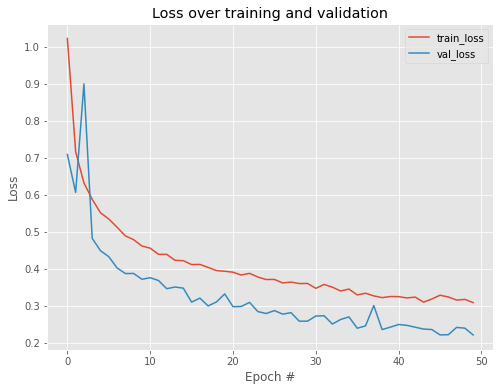

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(8,6))
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.title("Loss over training and validation")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
# plt.savefig("loss.png")
plt.show()

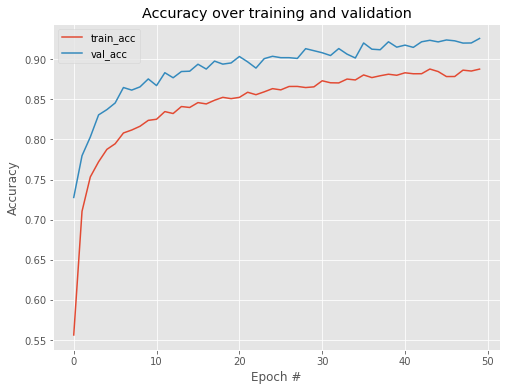

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(8,6))
plt.plot(np.arange(0, 50), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_accuracy"], label="val_acc")
plt.title("Accuracy over training and validation")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()
# plt.savefig("accuracy.png")
plt.show()

### Prediction

In [ ]:
from keras.models import load_model
model = load_model("drive/MyDrive/asd_loyolla/asd_loyolla_lstm.h5")

In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd

class poseDetector():
    def __init__(self, mode=False, upBody=False, complexity=1, smooth=True,
                 detectionCon=0.5, trackCon=0.5):
        self.mode = mode
        self.upBody = upBody
        self.complexity = complexity
        self.smooth = smooth
        self.detectionCon = detectionCon
        self.trackCon = trackCon
        self.mpDraw = mp.solutions.drawing_utils
        self.mpPose = mp.solutions.pose
        self.pose = self.mpPose.Pose(self.mode, self.upBody, self.complexity,self.smooth,
                                     self.detectionCon, self.trackCon)
    def findPose(self, img, draw=True):
        imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        self.results = self.pose.process(imgRGB)
        if self.results.pose_landmarks:
            if draw:
                self.mpDraw.draw_landmarks(img, self.results.pose_landmarks,
                                           self.mpPose.POSE_CONNECTIONS)
        return img
    def findPosition(self, img, draw=True):
        self.lmList = []
        self.lmList_ = []
        if self.results.pose_landmarks:
            for id, lm in enumerate(self.results.pose_landmarks.landmark):
                h, w, c = img.shape
                # print(id, lm)
                cx, cy = int(lm.x * w), int(lm.y * h)
                self.lmList.append([id, cx, cy])
                self.lmList_.append([cx, cy])
                if draw:
                    cv2.circle(img, (cx, cy), 1, (255, 0, 0), cv2.FILLED)
        return self.lmList, self.lmList_

In [ ]:
import os
import random
from imutils.video import FPS
from google.colab.patches import cv2_imshow
import warnings
warnings.filterwarnings("ignore")

#arm flapping
right_arm = 0
left_arm = 0
updownr_arm = 0
updownl_arm = 0
lr_arm = []

# head banging
updown_head = 0
leftright_head = 0
ud_head = []

# spinning
x = 0

fname = "/content/drive/MyDrive/asd_loyolla/clipped_videos/spinning/SP2.mp4"
cap = cv2.VideoCapture(fname)

detector = poseDetector()
length = []

if os.path.exists("testing.txt"):
  os.remove("testing.txt")
f = open('testing.txt', 'a+')
while True:
    success, img = cap.read()

    length.append(success)
    if len(length) == 420:
        break
    elif success == False:
        break
    
    img = cv2.resize(img, (480,360))
    img = detector.findPose(img, draw=True)
    lmList, lmList_ = detector.findPosition(img, draw=False)

    for item in lmList_:
        item = str(item).replace('[','').replace('] ',',')
        f.write("%s " % item)
    
    f.write("\n")
    # cv2_imshow(img)

    if len(lmList) != 0:

        # banging up and down
        diff_head_y = lmList[0][2] - updown_head
        updown_head = lmList[0][2]
        ud_head.append(abs(diff_head_y))

        diff_head_x = lmList[0][1] - leftright_head
        leftright_head = lmList[0][1]
        ud_head.append(abs(diff_head_x))

        # flapping right&left
        diff_arm = lmList[20][1] - right_arm
        right_arm = lmList[20][1]
        lr_arm.append(abs(diff_arm))

        diff_arm_left = lmList[19][1] - left_arm
        left_arm = lmList[19][1]
        lr_arm.append(abs(diff_arm_left))
        
        # flapping updown right&left
        diff_udr_arm = lmList[20][2] - updownr_arm
        updownr_arm = lmList[20][2]
        lr_arm.append(abs(diff_udr_arm))

        diff_udl_arm = lmList[19][2] - updownl_arm
        updownl_arm = lmList[19][2]
        lr_arm.append(abs(diff_udl_arm))
        
        # spinning
        diff = lmList[11][1] - lmList[12][1]
        if abs(diff) > 0 and abs(diff) < 4:
            x += 1

 # reading given csv file and creating dataframe
websites = pd.read_csv("testing.txt", header = None,
                        delimiter = ', | |\n|] |]')

websites = websites.iloc[:-1, :-1]

class_names = ["armflapping", "headbanging", "spinning"]

pred = model.predict(websites)
xy = []
z = []
for i in pred:
    xy.append(np.argmax(i))
    z.append(max(i))

most_common_item = max(xy, key = xy.count)
prediction = class_names[most_common_item]
print()
prob = round((sum(z)/len(z) *100), 2)
print("Probability of " + prediction, str(prob) + "%")
print()
# # head banging %
if "headbanging" in fname:
    del ud_head[:2]
    per_ud = round(((max(ud_head)/300) * 100), 2)
    print("Possibility of " + "headbanging", str(per_ud) + "%")

# # arm flapping %
if 'lapping' in fname:
    del lr_arm[:4]
    arm_per = round(((max(lr_arm)/640)*100), 2)
    print("Possibility of " + "armflapping",str(arm_per) + "%")
# # spinning %
if "spinning" in fname:
    if x == 0 or x == 1:
        print("Possibility of " + "spinning 35.61%")
    elif x < 25:
        y = round(((x/57) *100), 2)
        print("Possibility of " + "spinning", str(y) + "%")
    else:
        y = round(random.uniform(85.33, 95.66), 2)
        print("Possibility of " + "spinning", str(y) + "%")



Probability of spinning 94.95%

Possibility of spinning 88.66%
Autistic Child
